In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

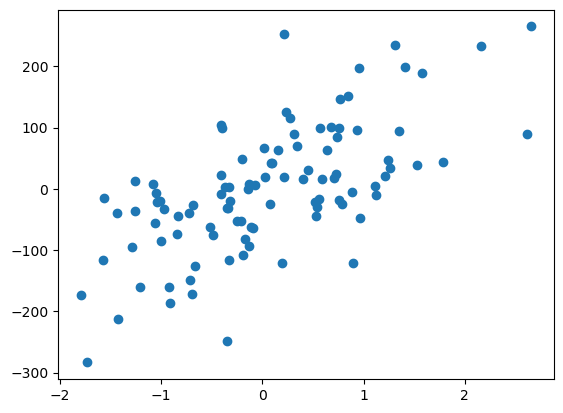

In [2]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:,0], y)

In [3]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [4]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(100, 3)
[[ 1.35025782  0.19977523  1.        ]
 [-0.25175216 -0.68129687  1.        ]
 [ 2.15631249  1.52582681  1.        ]
 [ 0.44885681  0.14579877  1.        ]
 [-0.07630332  0.17212543  1.        ]
 [ 1.40596672  1.58128643  1.        ]
 [-1.08177113  0.91928453  1.        ]
 [-0.35213777 -2.84937638  1.        ]
 [ 0.88553182 -0.43454587  1.        ]
 [ 0.73487888  0.38819916  1.        ]]


In [5]:
theta = np.random.randn(3, 1)
theta

array([[-1.39674144],
       [-1.01415947],
       [-0.92318954]])

In [6]:
def model(X, theta):
    return X.dot(theta)

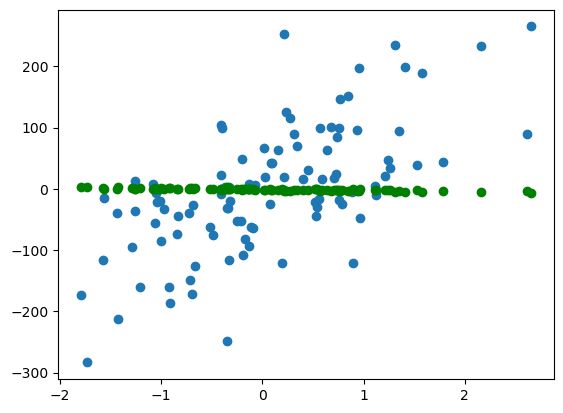

In [7]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c='g')

In [8]:
#Erreur quadratique moyenne

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [10]:
cost_function(X, y, theta)

5587.251168088602

In [11]:
#gradient

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    
    return theta, cost_history

In [14]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [15]:
theta_final

array([[57.98434862],
       [78.66669148],
       [ 0.36356756]])

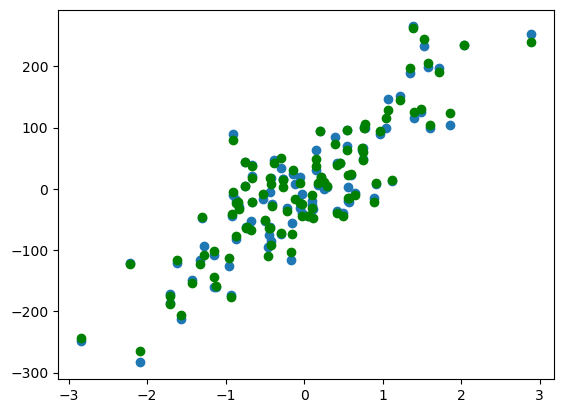

In [16]:
predictions = model(X, theta_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='g')

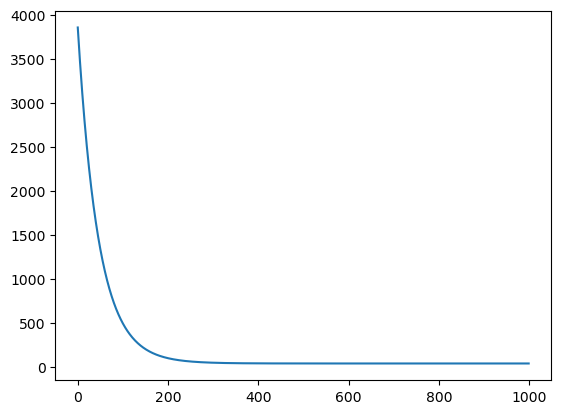

In [18]:
plt.plot(range(1000), cost_history)

In [19]:
def coef_determination(y, pred):
    u= ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [20]:
coef_determination(y, predictions)

0.9889090934245489

<IPython.core.display.Javascript object>


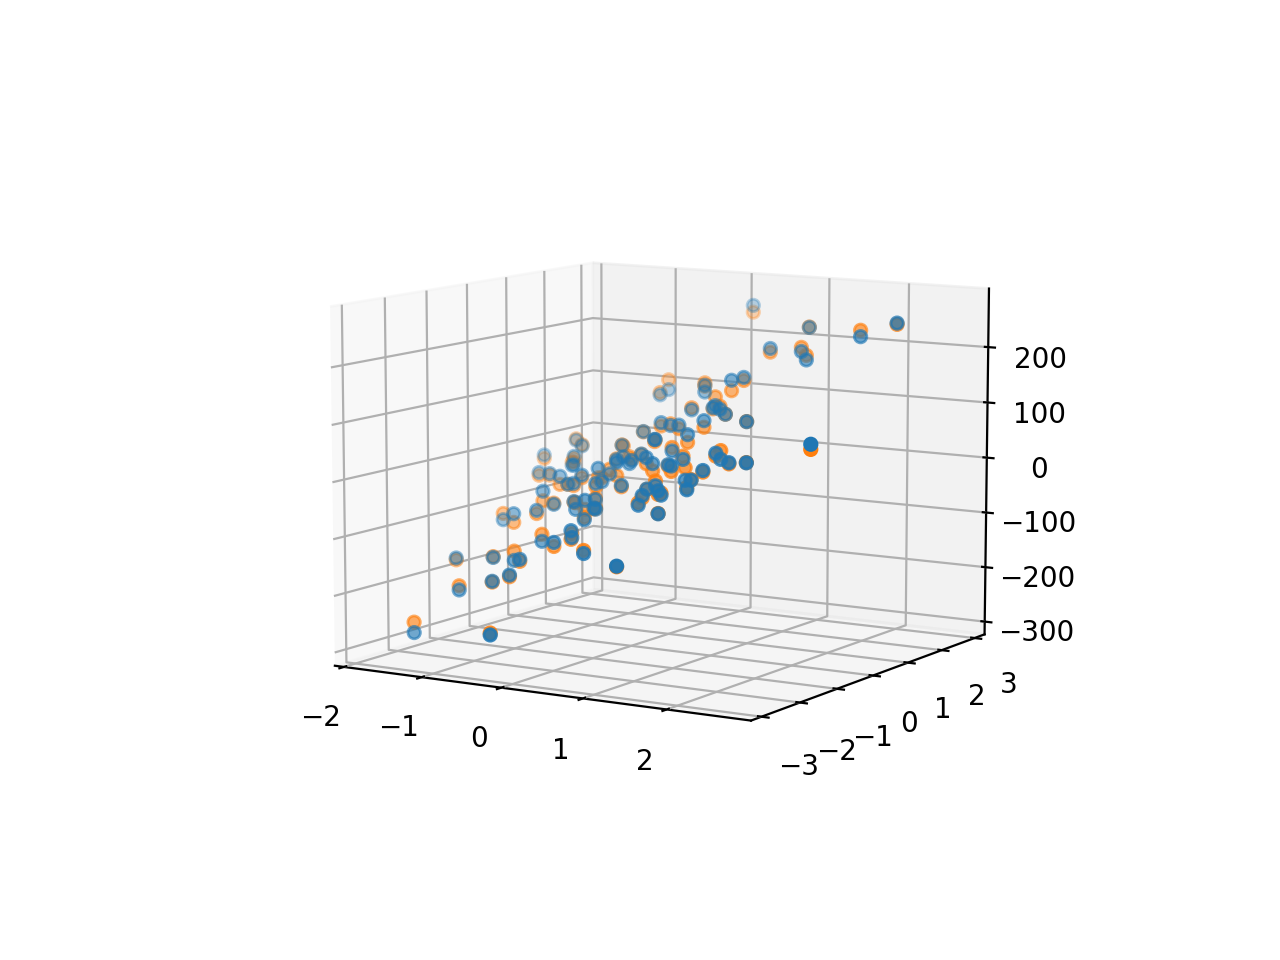

In [17]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)